# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [1]:
library(igraph)
library(dplyr)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

# flight dataset. 

X2B X410 AER X2965 KZN X2990 X X0 CR2
1 2B  410  ASF 2966  KZN 2990    0  CR2
2 2B  410  ASF 2966  MRV 2962    0  CR2
3 2B  410  CEK 2968  KZN 2990    0  CR2
4 2B  410  CEK 2968  OVB 4078    0  CR2
5 2B  410  DME 4029  KZN 2990    0  CR2
6 2B  410  DME 4029  NBC 6969    0  CR2

In [3]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B n   
1  FR  2484
2  AA  2354
3  UA  2180
4  DL  1981
5  US  1960
6  CZ  1454
7  MU  1263
8  CA  1260
9  WN  1146
10 U2  1130
11 AF  1071
12 LH   923
13 AZ   877
14 IB   831
15 KL   830
16 ZH   815
17 AB   798
18 FL   726
19 AC   705
20 TK   658

In [85]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="CZ") %>% tally()

n   
1 1454

In [86]:
df2 <- df %>% filter(X2B=="CZ") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))    #here in the dataset: AER: origin  , KZN: destination

head(df2)

AER KZN cnt
1 AAT URC 1  
2 ACX CAN 1  
3 AKL CAN 1  
4 AKU URC 1  
5 ALA URC 1  
6 AMS CAN 1

In [87]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

In [88]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}


In [89]:
links <- as.matrix(mtx)


In [90]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [91]:
### network size by edges
E(mynet)

+ 1454/1454 edges from ff623cd:
 [1]  1->166  2-> 18  3-> 18  4->166  5->166  6-> 18  6-> 29  6-> 60  6->133
[10]  6->138  6->177  7->133  8-> 18  9->166 10-> 18 11-> 22 11-> 28 11-> 29
[19] 11->144 11->146 11->166 11->170 12-> 18 12->152 13-> 18 13-> 22 13-> 26
[28] 13-> 28 13-> 89 13->146 14->152 15-> 18 15-> 22 15-> 28 15-> 48 15->119
[37] 15->126 15->148 15->170 15->177 16-> 18 17-> 89 18->  2 18->  3 18->  6
[46] 18->  8 18-> 10 18-> 12 18-> 13 18-> 15 18-> 16 18-> 19 18-> 20 18-> 21
[55] 18-> 22 18-> 23 18-> 24 18-> 26 18-> 27 18-> 28 18-> 29 18-> 30 18-> 31
[64] 18-> 32 18-> 35 18-> 36 18-> 37 18-> 40 18-> 44 18-> 45 18-> 48 18-> 50
[73] 18-> 51 18-> 54 18-> 55 18-> 56 18-> 58 18-> 59 18-> 60 18-> 61 18-> 62
[82] 18-> 63 18-> 65 18-> 68 18-> 69 18-> 74 18-> 76 18-> 77 18-> 78 18-> 80
+ ... omitted several edges

In [92]:
### network size by vertices (nodes)
V(mynet)

+ 193/193 vertices, from ff623cd:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

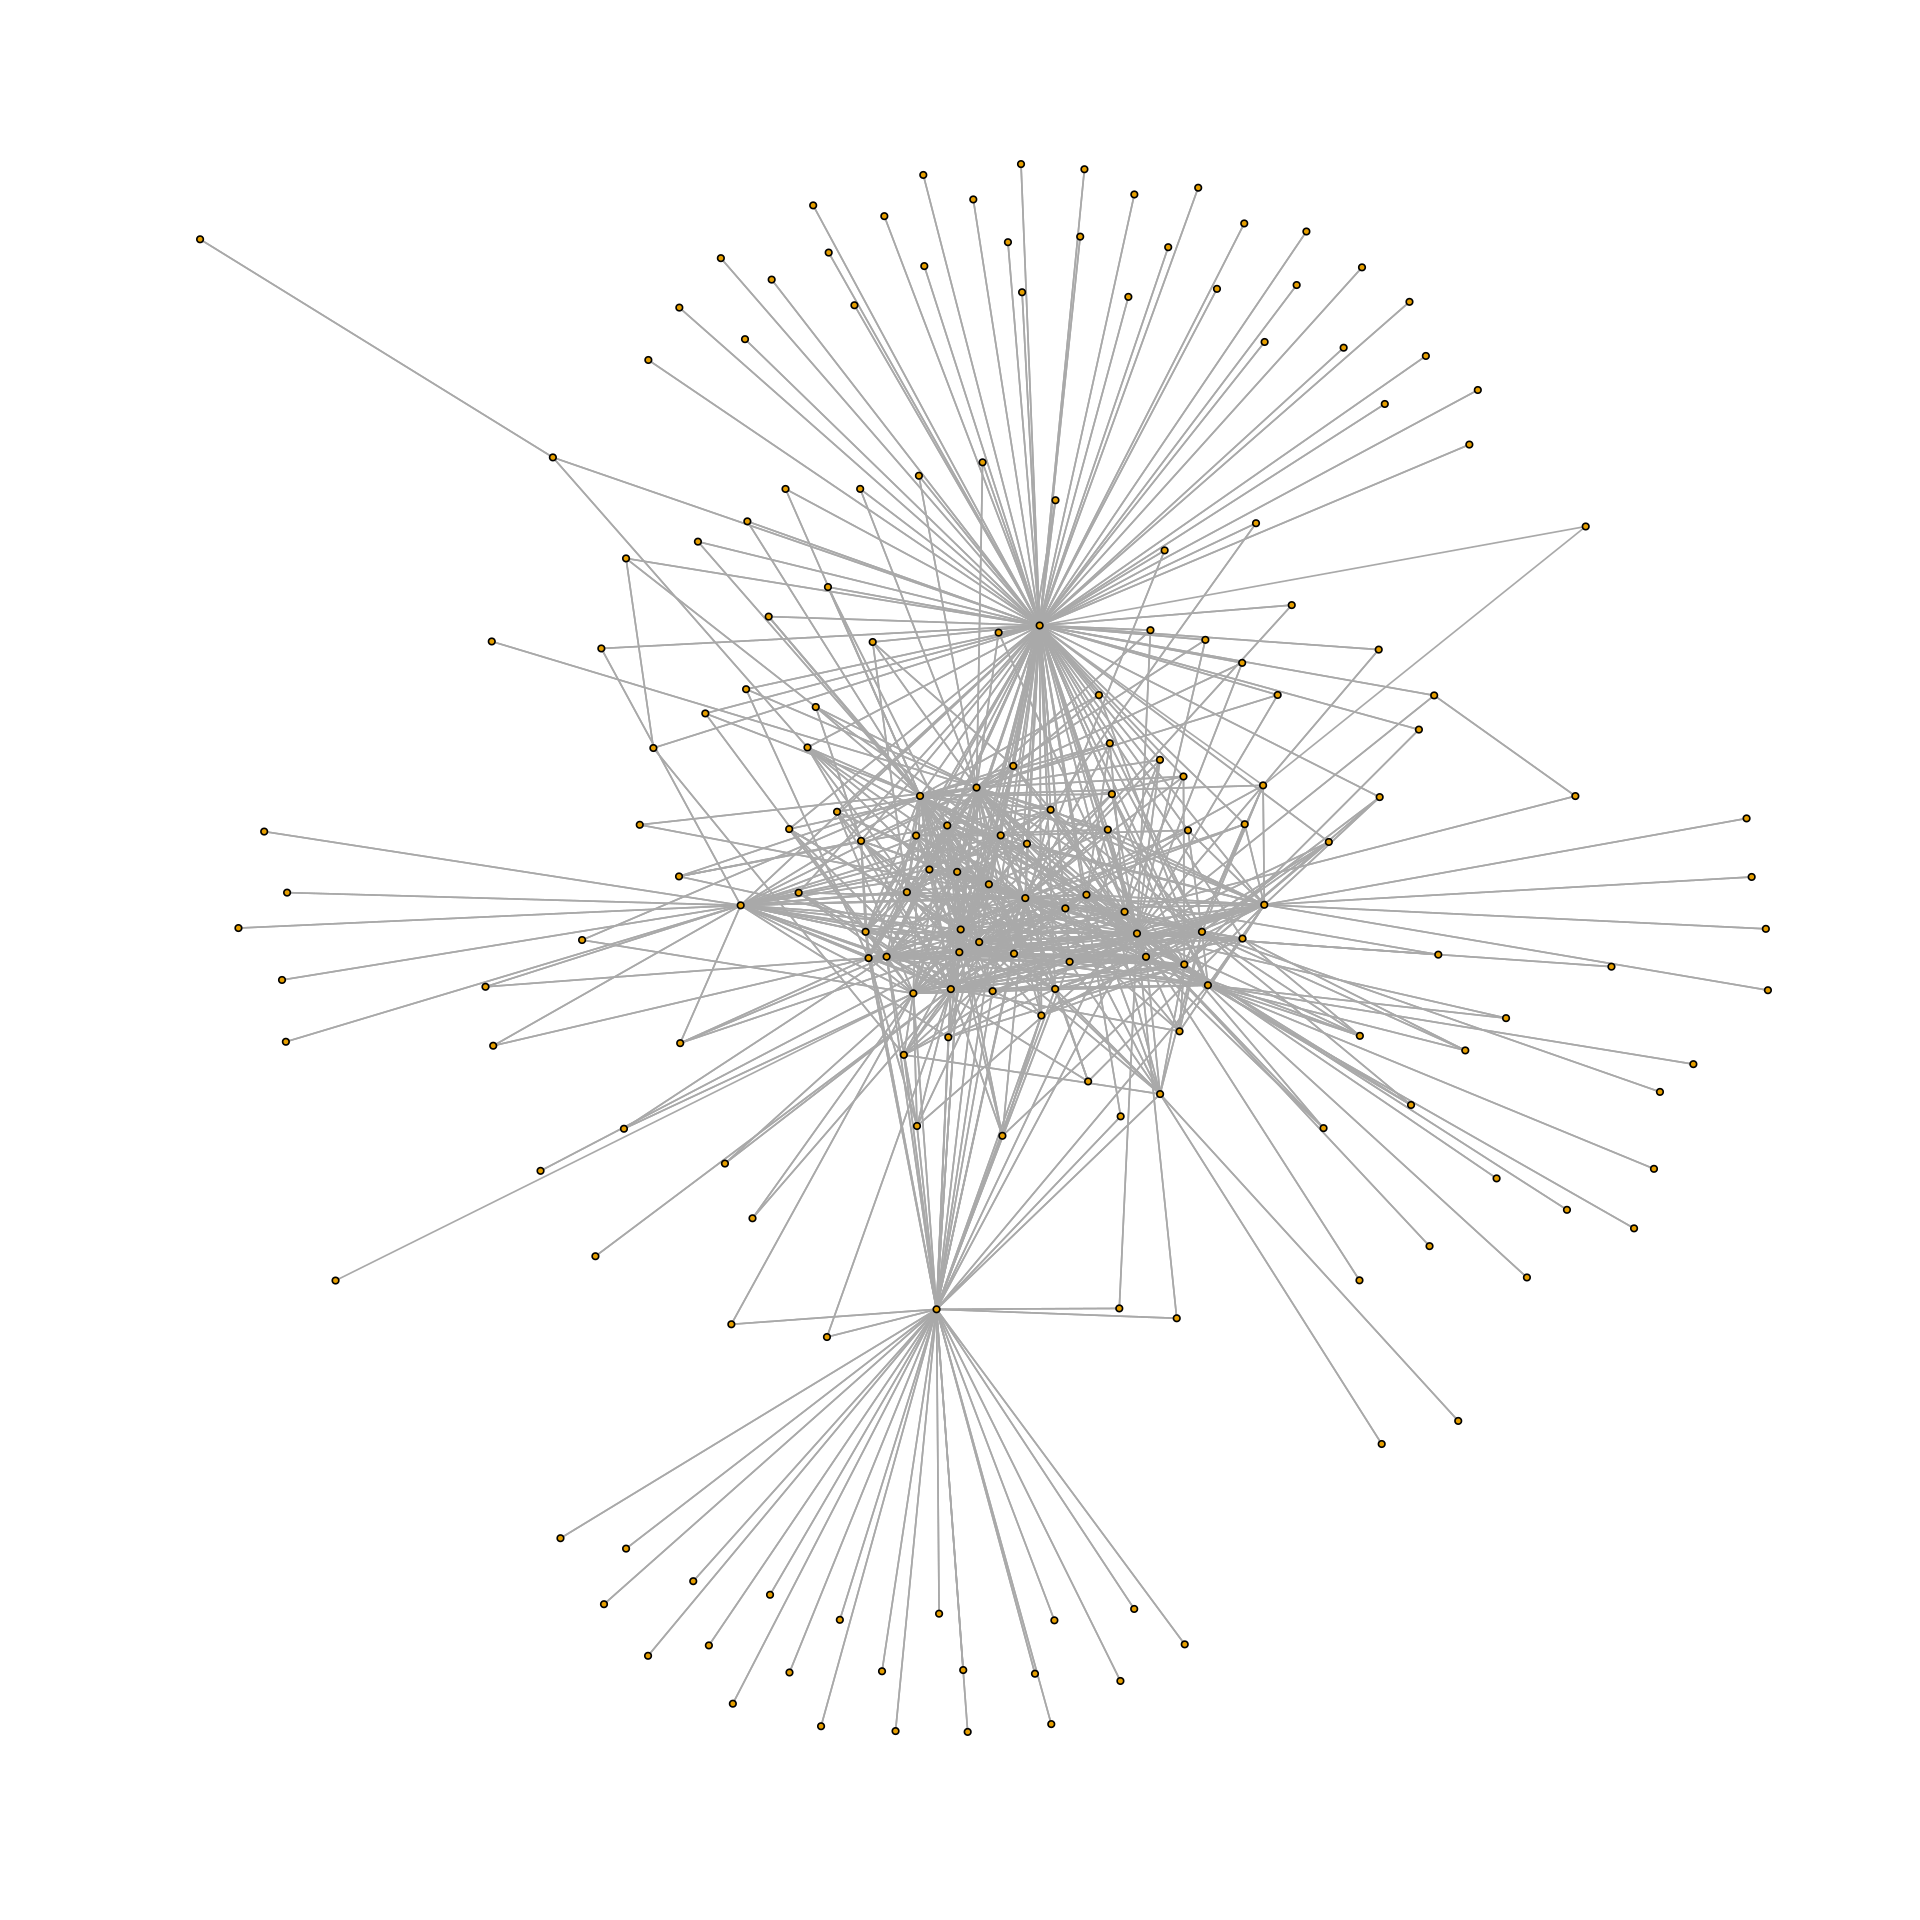

In [93]:
options(repr.plot.width = 16, repr.plot.height =16)

plot(mynet, edge.arrow.size=.01, vertex.label=NA, vertex.size =0.7)

# label = NA - because we didnt want to see the lavels on the graf
# size = 0.4 because we want to rectrict the size of the lines


### Measures

In [94]:
mean_distance(mynet, directed=F)

[1] 2.449104

In [95]:
diameter(mynet, directed=F,weights=NA)

[1] 5

In [96]:
centr_degree(mynet,mode="in",normalized=T)

$res
  [1]   1   1   1   1   1   6   1   1   1   1   7   2   6   1   9   1   1 115
 [19]   1   3   3  40  21   3   7  28   1  50  22   6   1   1   2   1   1   2
 [37]  30   2   2   2   2   1   2   1   6   1   1  28   1   1   2   1   1  16
 [55]   2   1   1  14  10  35   2   8   3   2  30   5   1   1  12   1  10   2
 [73]   1   1   2   1   1  11   1   1   2   1   1   1   2  14   1   4  35   3
 [91]   1   1   1   4  26  20   1   1   1   1   9   4   1   1   1   2   2   3
[109]   1   2   3   1   4   2   1   2   4   3   3   3   1  12   3  20   1  20
[127]   6   5   1   1   1   1  54   1   1   1   1  30   1   1   1   1  17  33
[145]   3  10   2  16   1   1  18  48  21   2   1   1   3   1  16   1  15   1
[163]  11   7  19  50   2   1   7  40   1   2   2   2   1  34  42   7   3   4
[181]   3   1  10   5   5   6   6   1   1   2  18   3   1

$centralization
[1] 0.5597204

$theoretical_max
[1] 37056

In [97]:
edge_density(mynet,loops=F)

[1] 0.03923791

In [98]:
degree(mynet)

[1]   2   2   2   2   2  12   2   2   2   2  14   4  12   2  18   2   2 230
 [19]   2   6   6  80  42   6  14  56   2 100  44  12   2   2   4   2   2   4
 [37]  60   4   4   4   4   2   4   2  12   2   2  56   2   2   4   2   2  32
 [55]   4   2   2  28  20  70   4  16   6   4  60  10   2   2  24   2  20   4
 [73]   2   2   4   2   2  22   2   2   4   2   2   2   4  28   2   8  70   6
 [91]   2   2   2   8  52  40   2   2   2   2  18   8   2   2   2   4   4   6
[109]   2   4   6   2   8   4   2   4   8   6   6   6   2  24   6  40   2  40
[127]  12  10   2   2   2   2 108   2   2   2   2  60   2   2   2   2  34  66
[145]   6  20   4  32   2   2  36  96  42   4   2   2   6   2  32   2  30   2
[163]  22  14  38 100   4   2  14  80   2   4   4   4   2  69  84  14   6   8
[181]   6   2  20  10  10  12  12   2   2   4  36   6   1

In [99]:
mean(degree(mynet))

[1] 15.06736

### Clusters

In [100]:
cliques(mynet)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[[1]]
+ 1/193 vertex, from ff623cd:
[1] 18

[[2]]
+ 1/193 vertex, from ff623cd:
[1] 152

[[3]]
+ 1/193 vertex, from ff623cd:
[1] 191

[[4]]
+ 1/193 vertex, from ff623cd:
[1] 71

[[5]]
+ 1/193 vertex, from ff623cd:
[1] 178

[[6]]
+ 1/193 vertex, from ff623cd:
[1] 11

[[7]]
+ 1/193 vertex, from ff623cd:
[1] 184

[[8]]
+ 1/193 vertex, from ff623cd:
[1] 180

[[9]]
+ 1/193 vertex, from ff623cd:
[1] 113

[[10]]
+ 1/193 vertex, from ff623cd:
[1] 102

[[11]]
+ 1/193 vertex, from ff623cd:
[1] 123

[[12]]
+ 1/193 vertex, from ff623cd:
[1] 120

[[13]]
+ 1/193 vertex, from ff623cd:
[1] 111

[[14]]
+ 1/193 vertex, from ff623cd:
[1] 173

[[15]]
+ 1/193 vertex, from ff623cd:
[1] 167

[[16]]
+ 1/193 vertex, from ff623cd:
[1] 154

[[17]]
+ 1/193 vertex, from ff623cd:
[1] 106

[[18]]
+ 1/193 vertex, from ff623cd:
[1] 85

[[19]]
+ 1/193 vertex, from ff623cd:
[1] 75

[[20]]
+ 1/193 vertex, from ff623cd:
[1] 72

[[21]]
+ 1/193 vertex, from ff623cd:
[1] 64

[[22]]
+ 1/193 vertex, from ff623cd:
[1] 43

[[23]

In [101]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2
  [109] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2 2 1 2 2 1
  [145] 2 2 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1 2 2 1 2 1 2 1 2
  [181] 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
  [217] 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 3 3 2 3
  [253] 2 3 2 3 3 2 3 3 2 3 3 2 3 3 2 3 2 3 2 3 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3
  [289] 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 3 2 3 3 2 3 3 2 2 2 1 2 3 3 2 3 3
  [325] 3 2 2 2 1 2 3 2 3 2 1 2 3 3 2 3 3 2 3 3 2 2 1 2 3 3 2 3 3 2 2 1 2 3 3 3
  [361] 2 2 2 1 2 3 3 3 2 2 2 1 2 3 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3
  [397] 2 3 2 1 2 3 2 1 2 3 3 2 2 1 2 3 3 2 2 1 2 3 3 2 3 3 2 3 3 2 2 1 2 3 2 1
  [433] 2 3 2 1 2 3 2 2 1 2 3 2 1 2 3 2 1 2 3 4 4 3 3 2 3 4 4 3 3 2 3 4 4 3 4 4
  [469] 3 3 2 3 4 3 4 3 2 3 4 4 3 4 4 3 4 4 3 3 2 3 4 3 4 4 4 3 4 4 4 3 4 4 4 3
  [505] 3 3 2 3 2 3 3 3 2 3 3 3 2 3 3 3 2 2 2 2 2 1 2 3 4 4 3 4 4 3 4 4 3 3 2 3
  [541] 4 4 3 4 4 3 4 4 3 3 2 3 4 3 4 4 4 3 4 4 4 3 4 4 4 3 3 3 3 3 2 3 2 3 2 3
  [577] 3 3 2 3 3 3 2 3 3 3 2 2 2 2 2 2 2 2 2 2 1 2 3 4 3 4 3 2 3 4 3 2 3 4 4 3
  [613] 4 4 3 3 2 3 3 2 3 3 2 2 1 2 3 4 4 3 3 2 3 3 2 2 1 2 3 4 3 2 3 2 3 2 1 2
  [649] 3 4 4 3 3 2 3 4 4 3 3 2 3 3 2 2 1 2 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 5 4 5
  [685] 5 4 4 3 4 5 4 5 4 3 4 5 5 4 5 5 4 5 5 4 4 3 4 5 4 5 5 5 4 5 5 5 4 5 5 5
  [721] 4 4 4 3 4 3 4 4 4 3 4 4 4 3 4 4 4 3 3 3 3 2 3 4 3 4 3 4 3 2 3 4 3 2 3 4
  [757] 4 4 3 3 3 2 3 4 4 3 4 4 3 3 2 3 4 3 4 3 2 3 4 4 3 4 4 3 3 2 3 4 4 3 4 4
  [793] 3 4 4 3 3 2 3 4 3 4 3 4 4 4 3 4 4 4 3 4 4 4 3 3 3 2 3 2 3 2 3 2 3 2 3 2
  [829] 3 2 3 2 3 2 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 2 2 2 2 2 1 2 3 4 5 4 5 4
  [865] 3 4 5 5 4 5 5 4 5 5 4 4 3 4 5 5 5 4 5 5 5 4 5 5 5 4 4 4 3 4 4 4 3 4 4 4
  [901] 3 4 4 4 3 3 3 3 2 3 4 4 3 3 2 3 4 3 4 3 4 3 2 3 4 3 4 3 2 3 4 4 3 3 2 3
  [937] 4 4 3 4 4 3 4 4 3 3 2 3 4 4 4 3 4 4 4 3 4 4 4 3 3 3 2 3 2 3 2 3 2 3 3 3
  [973] 2 3 3 3 2 3 3 3 2 2 2 2 1 2 3 4 5 4 5 4 5 4 3 4 5 4 5 4 5 4 3 4 3 4 3 4
 [1009] 3 2 3 4 5 4 3 4 5 4 5 4 3 4 5 4 5 4 5 4 3 4 3 4 3 4 3 2 3 4 4 3 3 2 3 4
 [1045] 3 4 3 4 3 2 3 4 3 4 3 2 3 4 4 3 3 2 3 4 4 4 3 4 4 3 4 4 4 3 3 3 3 3 2 3
 [1081] 2 3 3 3 3 3 2 3 3 3 2 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [1117] 2 2 2 2 2 2 2 2 2 1 2 3 4 5 5 4 4 3 4 4 3 3 2 3 4 5 5 4 5 5 4 5 5 4 4 3
 [1153] 4 5 5 4 5 5 4 5 5 4 4 3 4 5 5 4 5 5 4 5 5 4 4 4 3 4 4 3 4 4 3 4 4 3 3 3
 [1189] 3 3 2 3 4 5 5 4 4 3 4 5 5 4 5 5 4 4 3 4 5 4 5 4 3 4 5 5 4 5 5 4 5 5 4 4
 [1225] 3 4 5 5 4 5 5 4 5 5 4 4 3 4 4 3 4 4 3 4 4 3 3 2 3 4 3 4 3 2 3 4 3 4 3 2
 [1261] 3 4 3 2 3 4 4 3 3 2 3 4 4 3 4 4 3 3 2 3 4 4 3 4 4 3 4 4 3 3 2 3 4 3 4 3
 [1297] 2 3 4 4 3 4 4 3 3 2 3 4 4 3 4 4 3 4 4 3 3 2 3 4 3 4 4 3 4 4 3 4 4 3 3 3
 [1333] 2 3 2 3 2 3 3 2 3 3 2 3 3 2 3 3 2 2 2 2 2 2 1 2 3 4 5 4 5 4 3 4 5 4 5 4
 [1369] 3 4 5 4 5 4 4 3 4 3 4 3 3 2 3 4 5 4 3 4 5 4 5 4 3 4 5 4 5 4 3 4 3 4 3 2
 [1405] 3 2 3 2 3 4 3 4 3 2 3 4 3 2 3 4 3 2 3 4 3 4 3 2 3 4 3 4 3 4 3 3 3 2 3 2
 [1441] 3 2 3 2 3 2 2 2 1 2 3 4 5 5 4 5 5 4 4 3 4 4 3 4 4 3 3 3 2 3 4 4 3 3 2 3
 [1477] 4 3 4 4 3 4 4 3 3 2 3 2 3 3 2 3 3 2 2 2 1 2 3 4 5 6 6 5 6 6 5 6 6 5 5 4
 [1513] 5 6 6 6 5 6 6 6 5 6 6 6 5 5 5 4 5 5 5 4 5 5 5 4 5 5 5 4 4 4 3 4 5 5 4 4
 [1549] 3 4 5 5 4 5 5 4 5 5 4 4 3 4 5 5 5 4 5 5 5 4 5 5 5 4 4 4 3 4 4 4 3 4 4 4
 [1585] 3 4 4 4 3 3 3 2 3 4 5 6 6 5 6 6 5 6 6 5 5 4 5 6 6 6 5 6 6 6 5 6 6 6 5 5
 [1621] 5 4 5 5 5 4 5 5 5 4 5 5 5 4 4 4 3 4 5 5 5 4 4 4 3 4 5 5 4 5 5 4 4 3 4 5
 [1657] 5 4 5 5 4 5 5 4 4 3 4 5 5 5 4 5 5 5 4 5 5 5 4 4 4 3 4 4 4 3 4 4 4 3 4 4
 [1693] 4 3 4 4 4 3 3 3 2 3 4 3 4 3 2 3 4 5 5 4 5 5 4 5 5 4 4 3 4 5 5 5 4 5 5 5
 [1729] 4 5 5 5 4 4 4 3 4 4 4 3 4 4 4 3 4 4 4 3 3 3 3 2 3 4 4 4 3 3 3 2 3 4 4 3
 [1765] 4 4 3 3 2 3 4 4 3 4 4 3 4 4 3 3 2 3 4 4 4 3 4 4 4 3 4 4 4 3 3 3 2 3 2 3
 [18

In [102]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
“At cliques.c:1087 :directionality of edges is ignored for directed graphs”


[[1]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  29 177  96 176

[[2]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  29  48 176  96

[[3]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  29  48 176  95

[[4]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26 177 151 176

[[5]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26 177  96 176

[[6]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26 177  96 126

[[7]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26 177  54 126

[[8]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26  48 176 151

[[9]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26  48 176  96

[[10]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26  48 176  95

[[11]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26  48 126  96

[[12]]
+ 9/193 vertices, from ff623cd:
[1] 152 170 133  60  89  26  48 126  95

[[13]]
+ 9/193 vertices, from ff623cd:
[1] 152 17

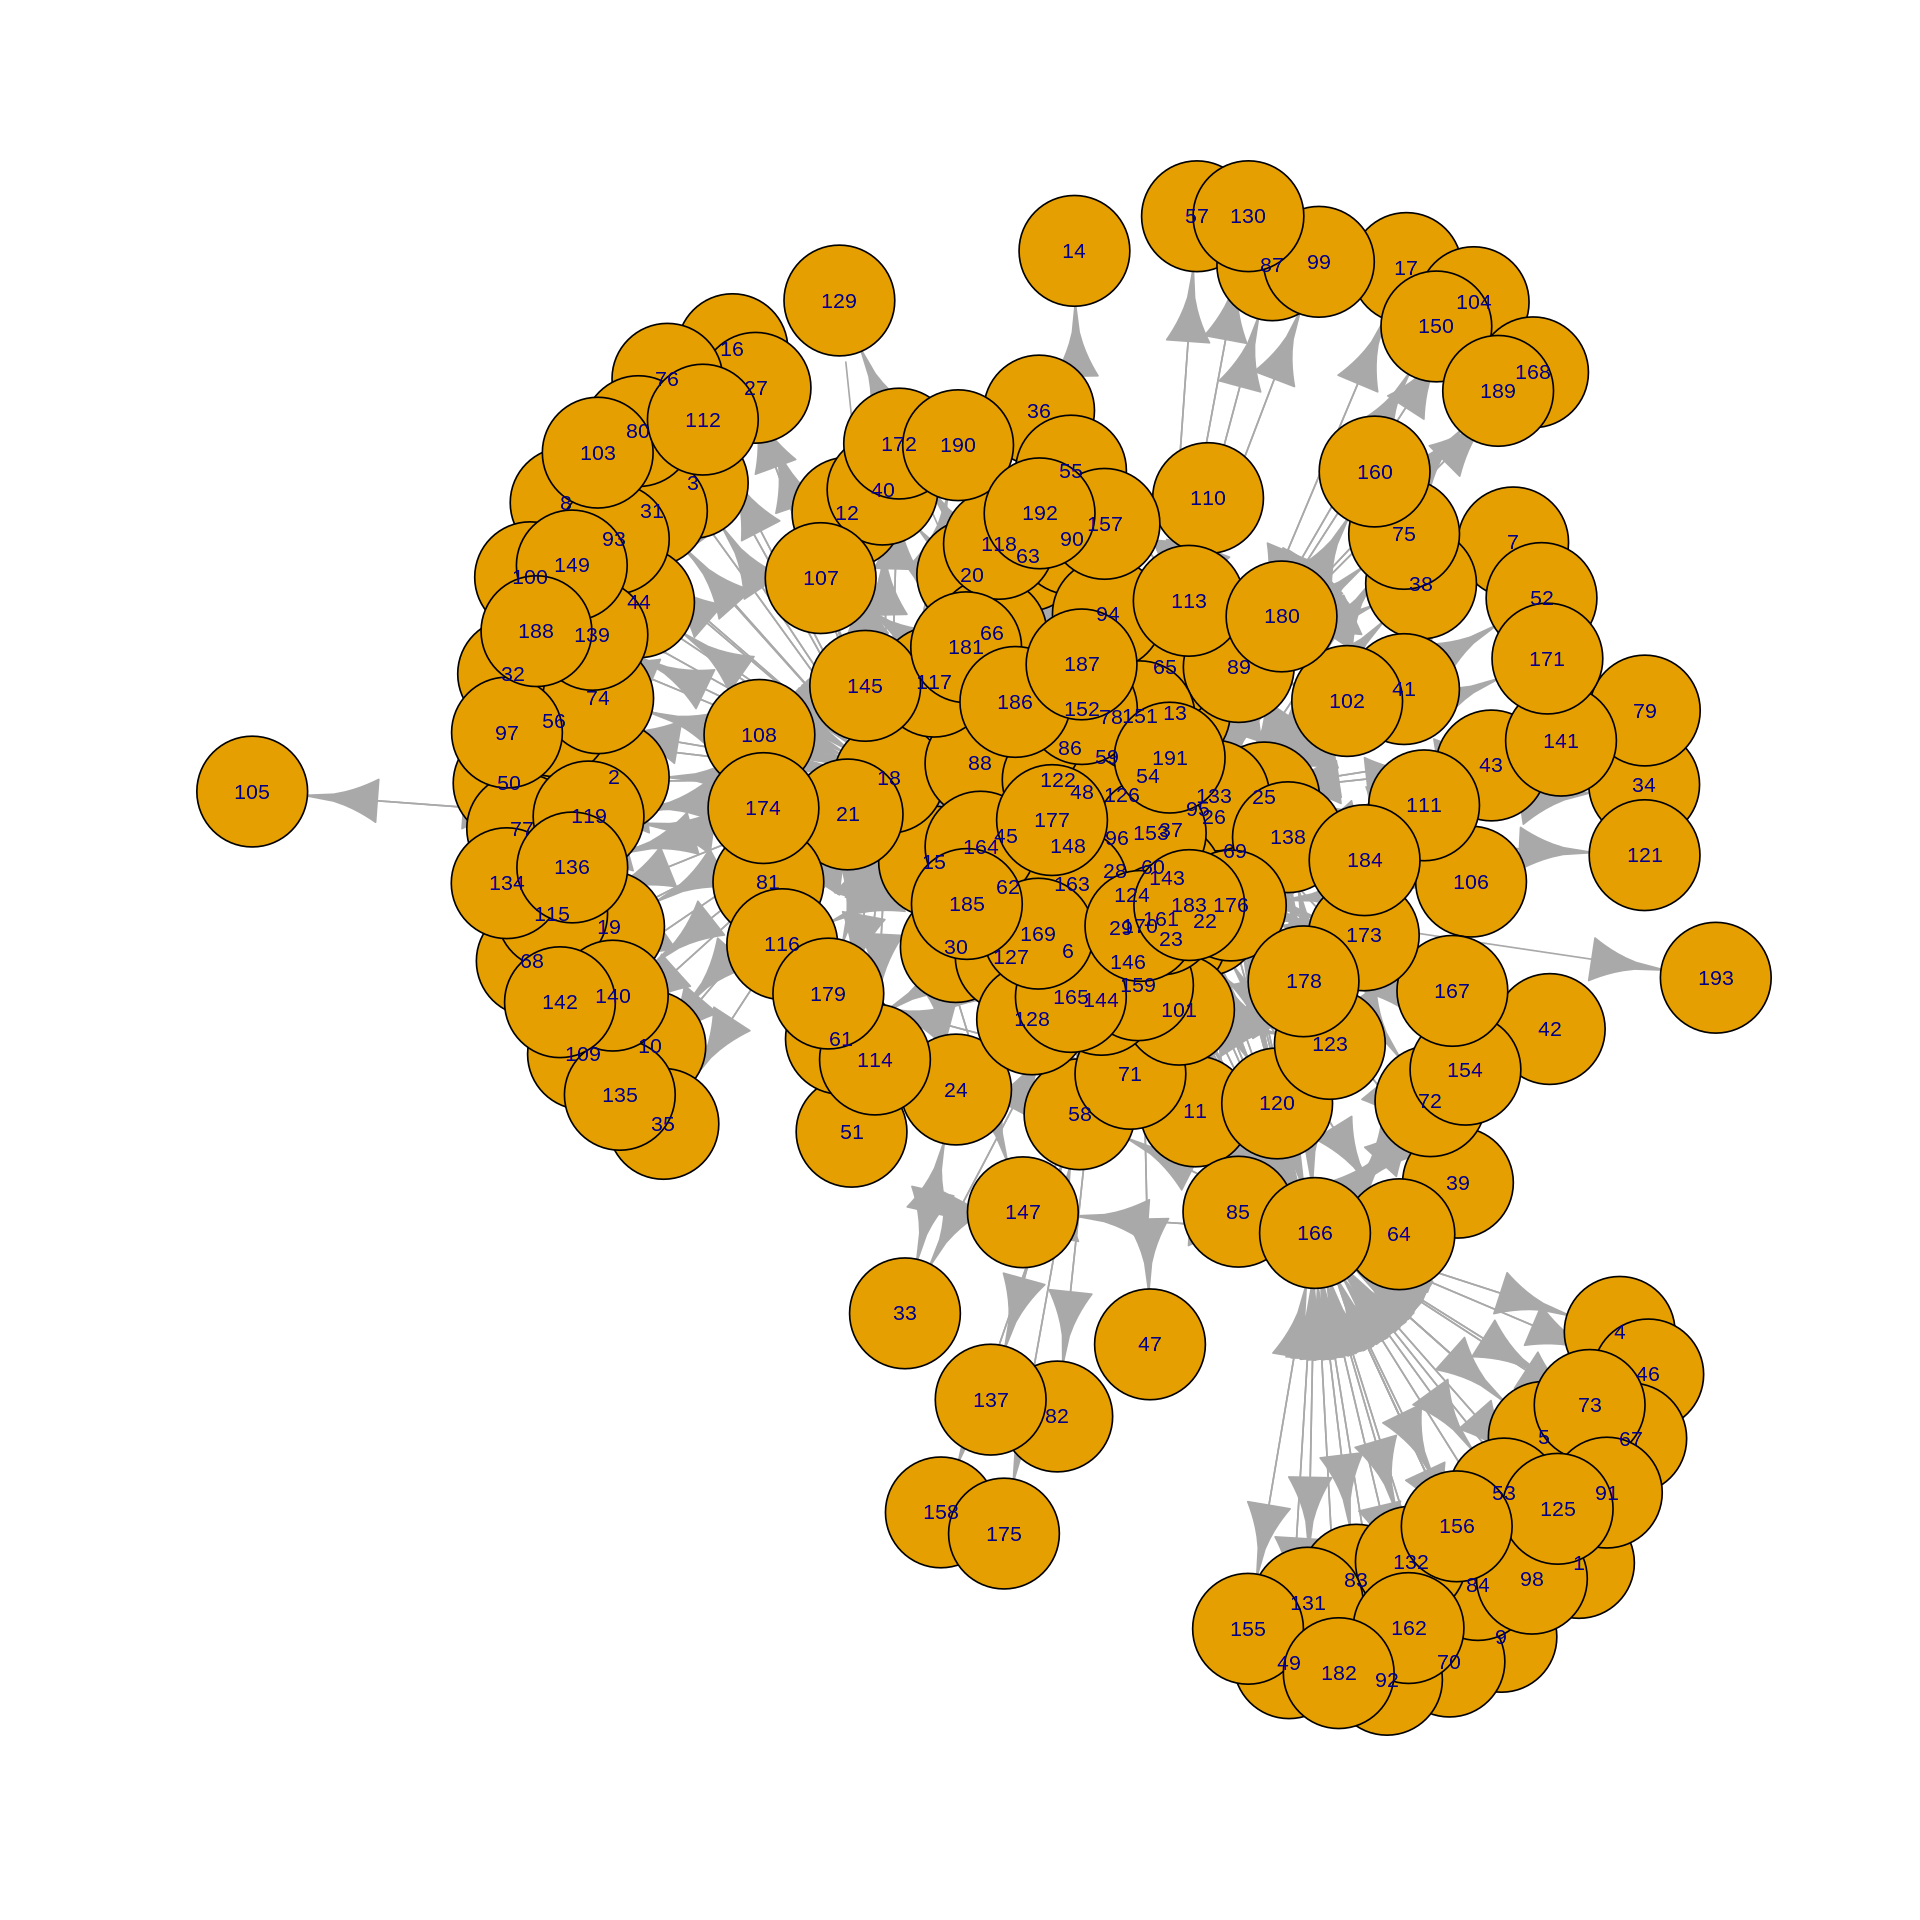

In [103]:
plot(as.directed(mynet))

### Hubs

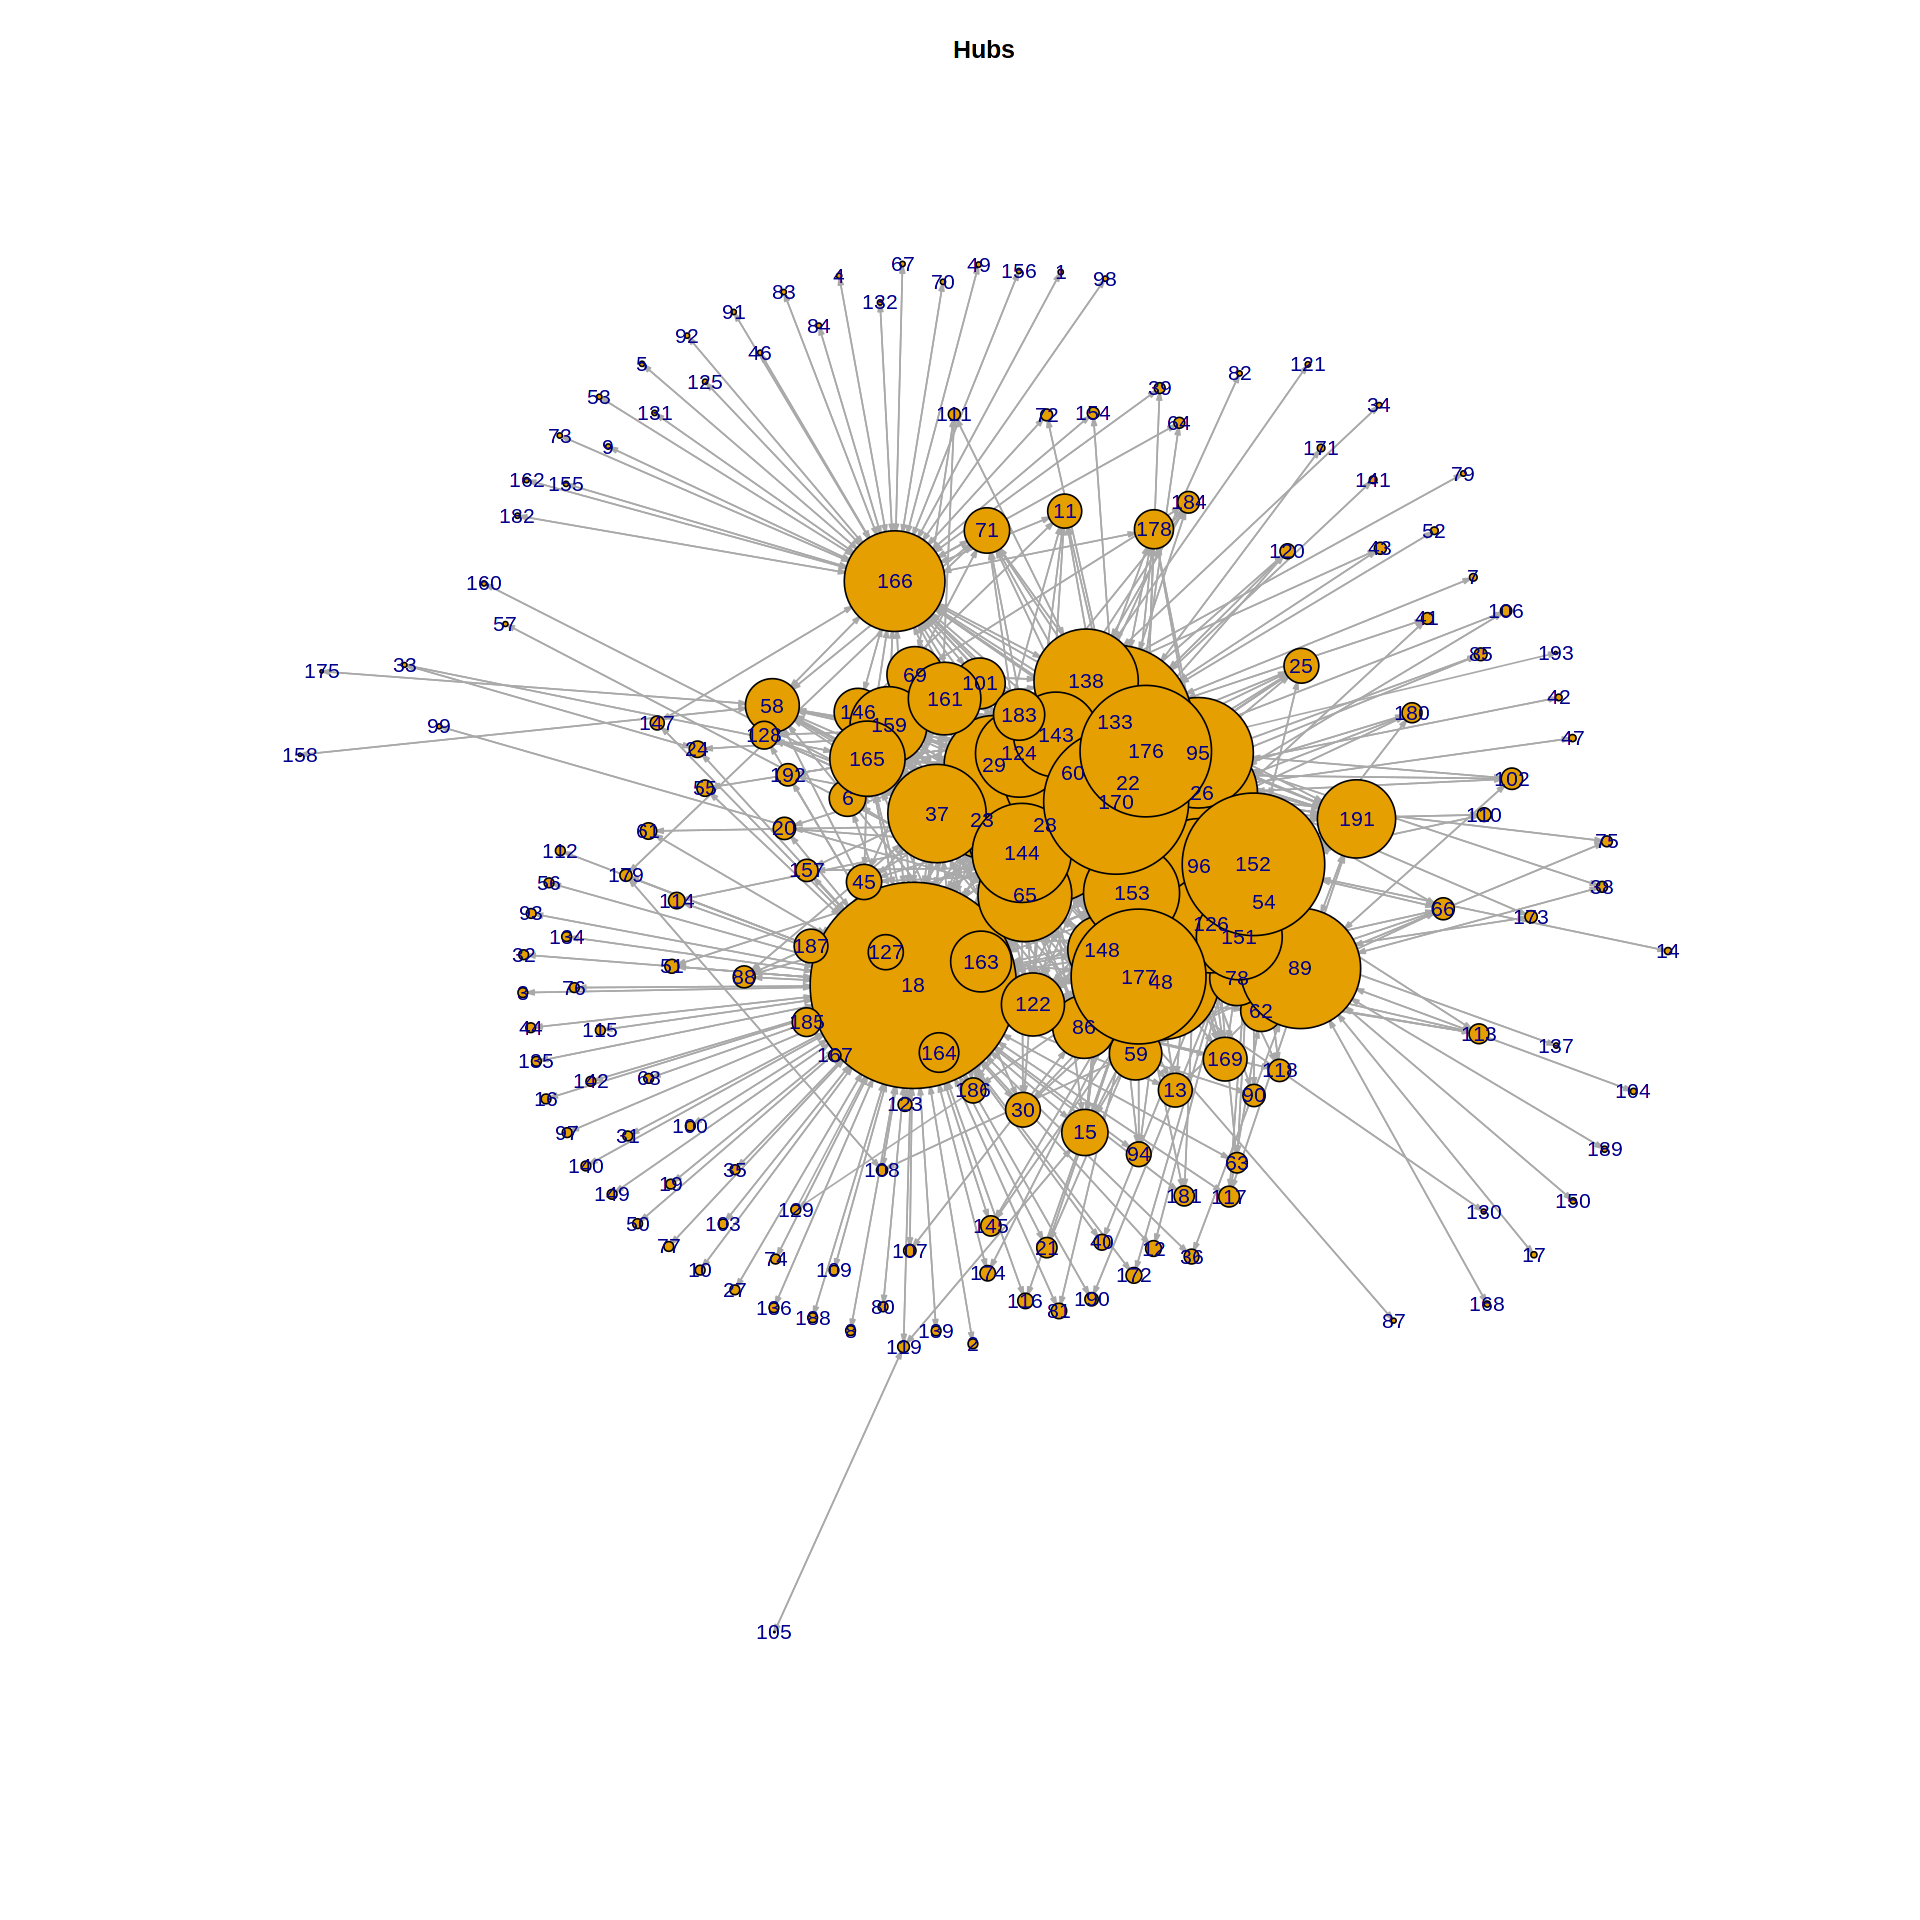

In [104]:


set.seed(11)

hs <- hub_score(mynet)$vector
plot(mynet, vertex.size=hs * 30,main="Hubs",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Authority

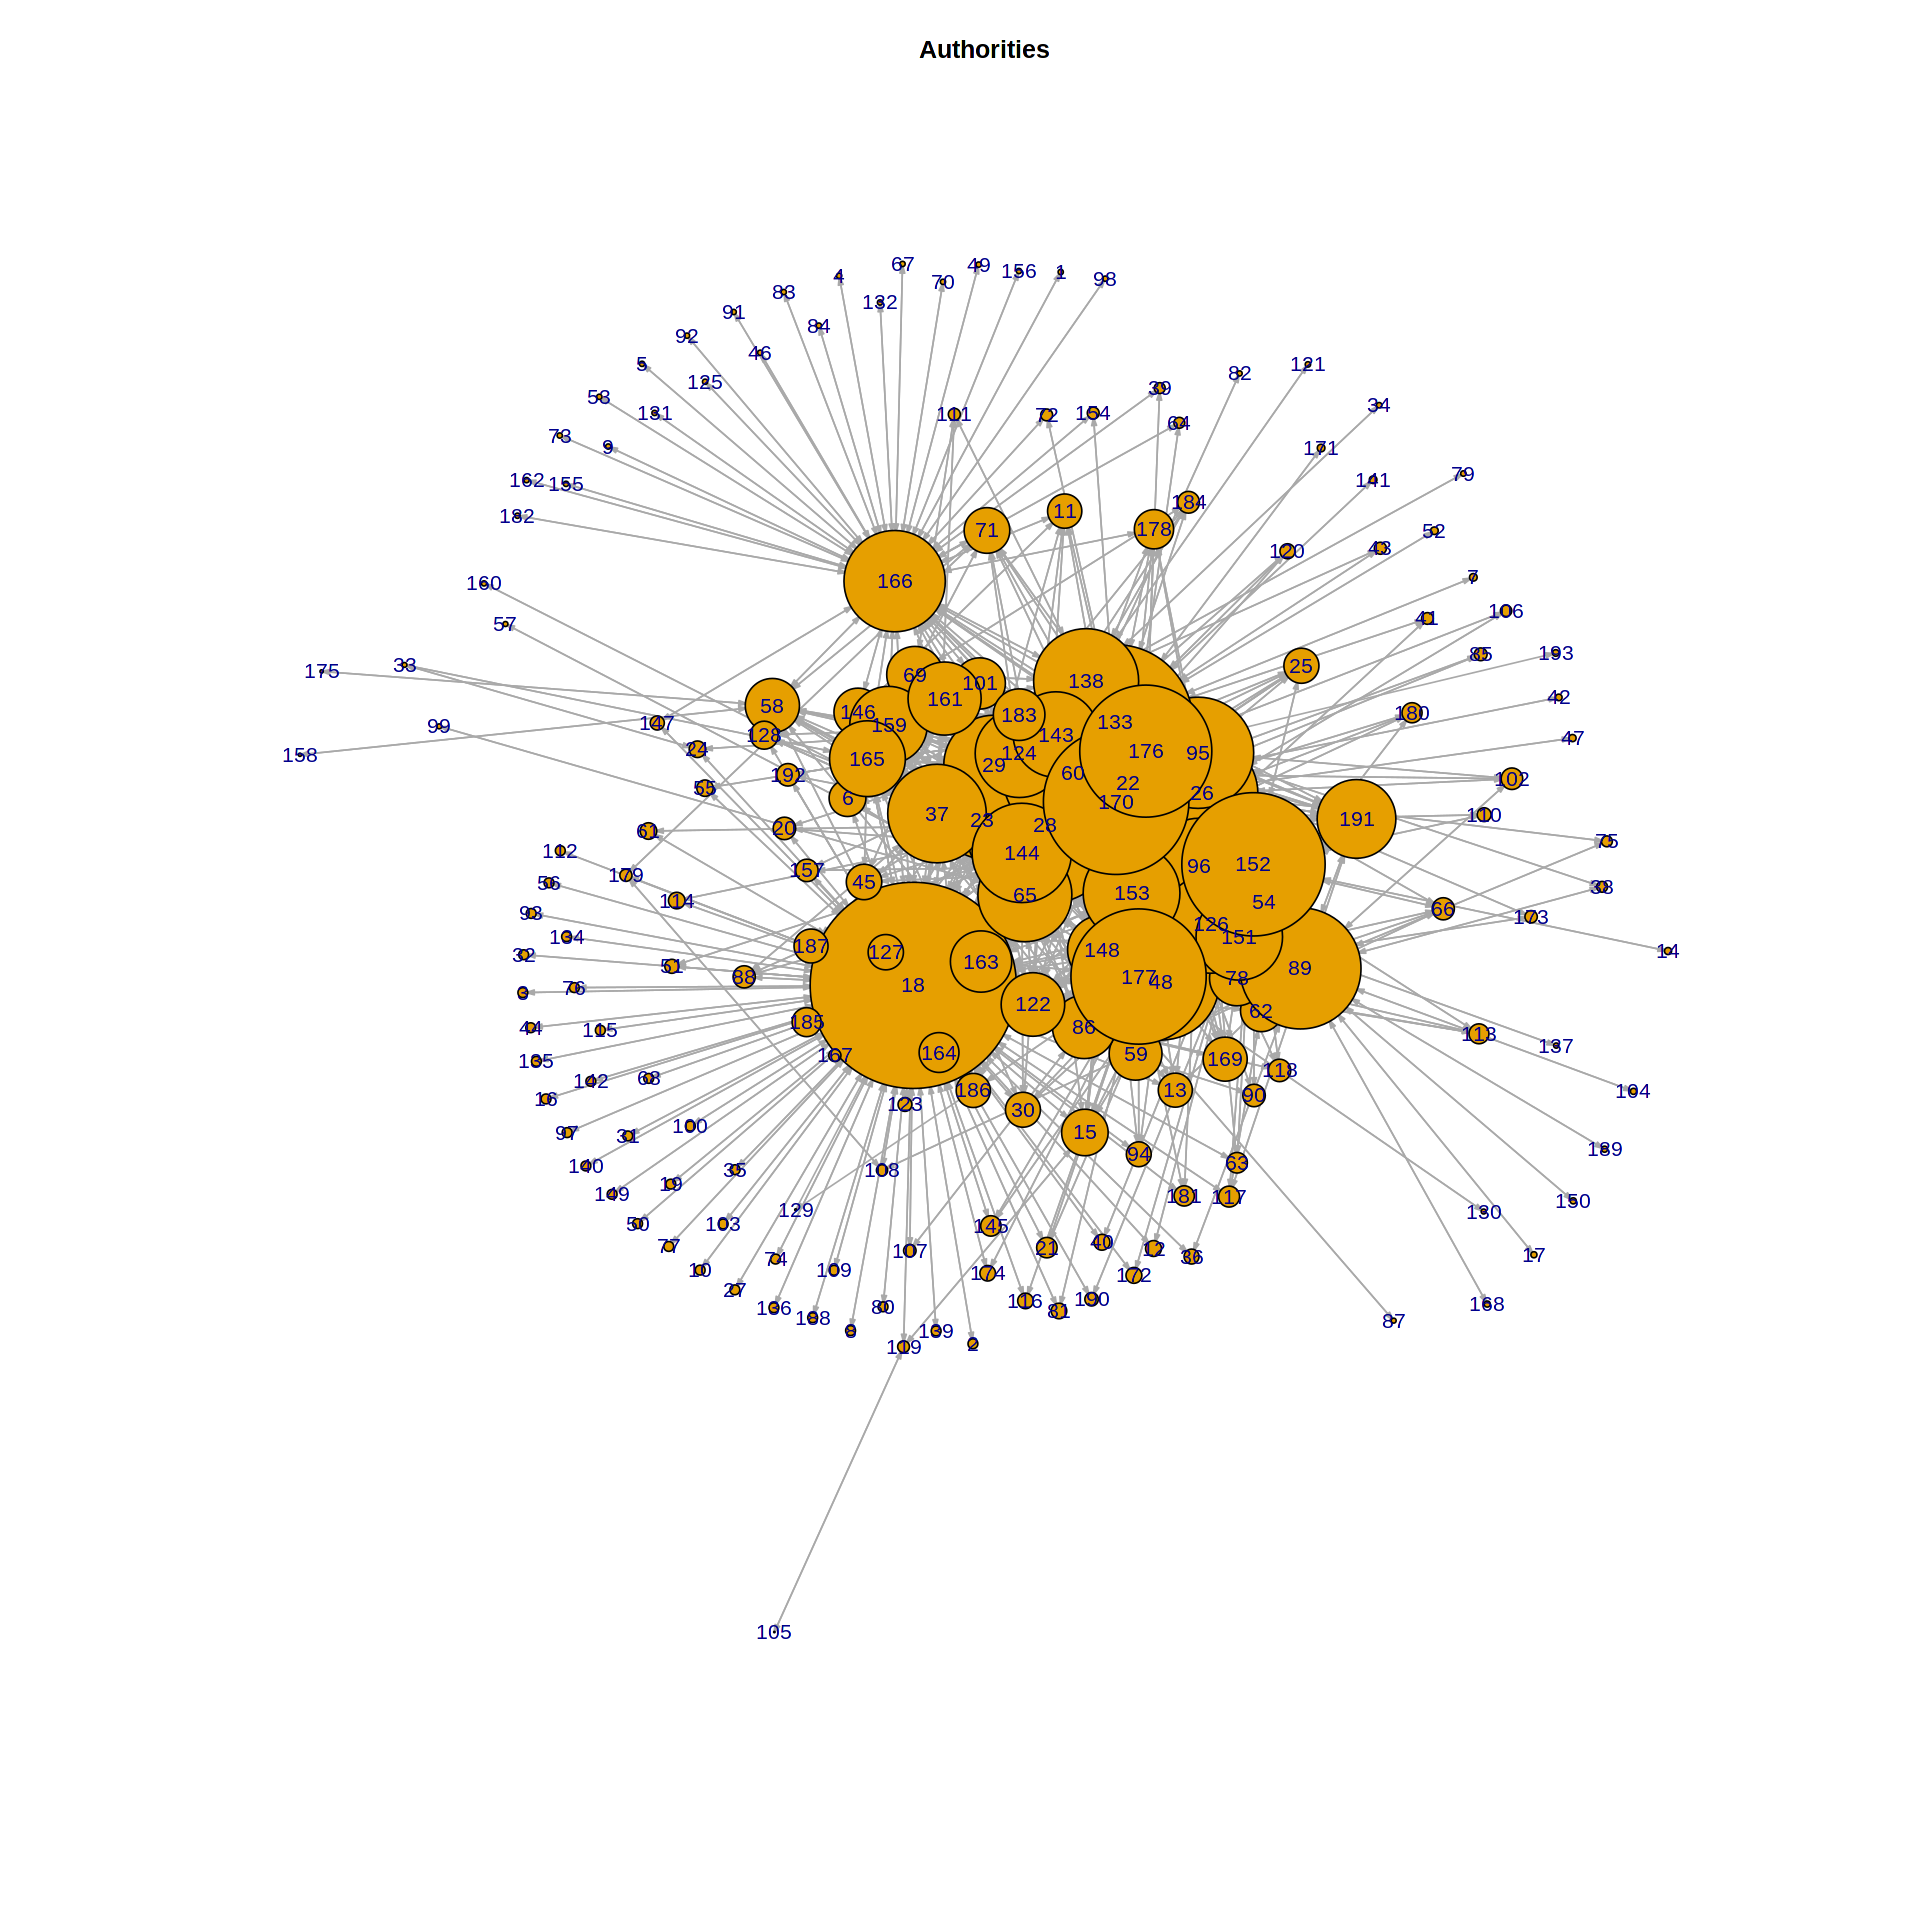

In [105]:
set.seed(11)

au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 30,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

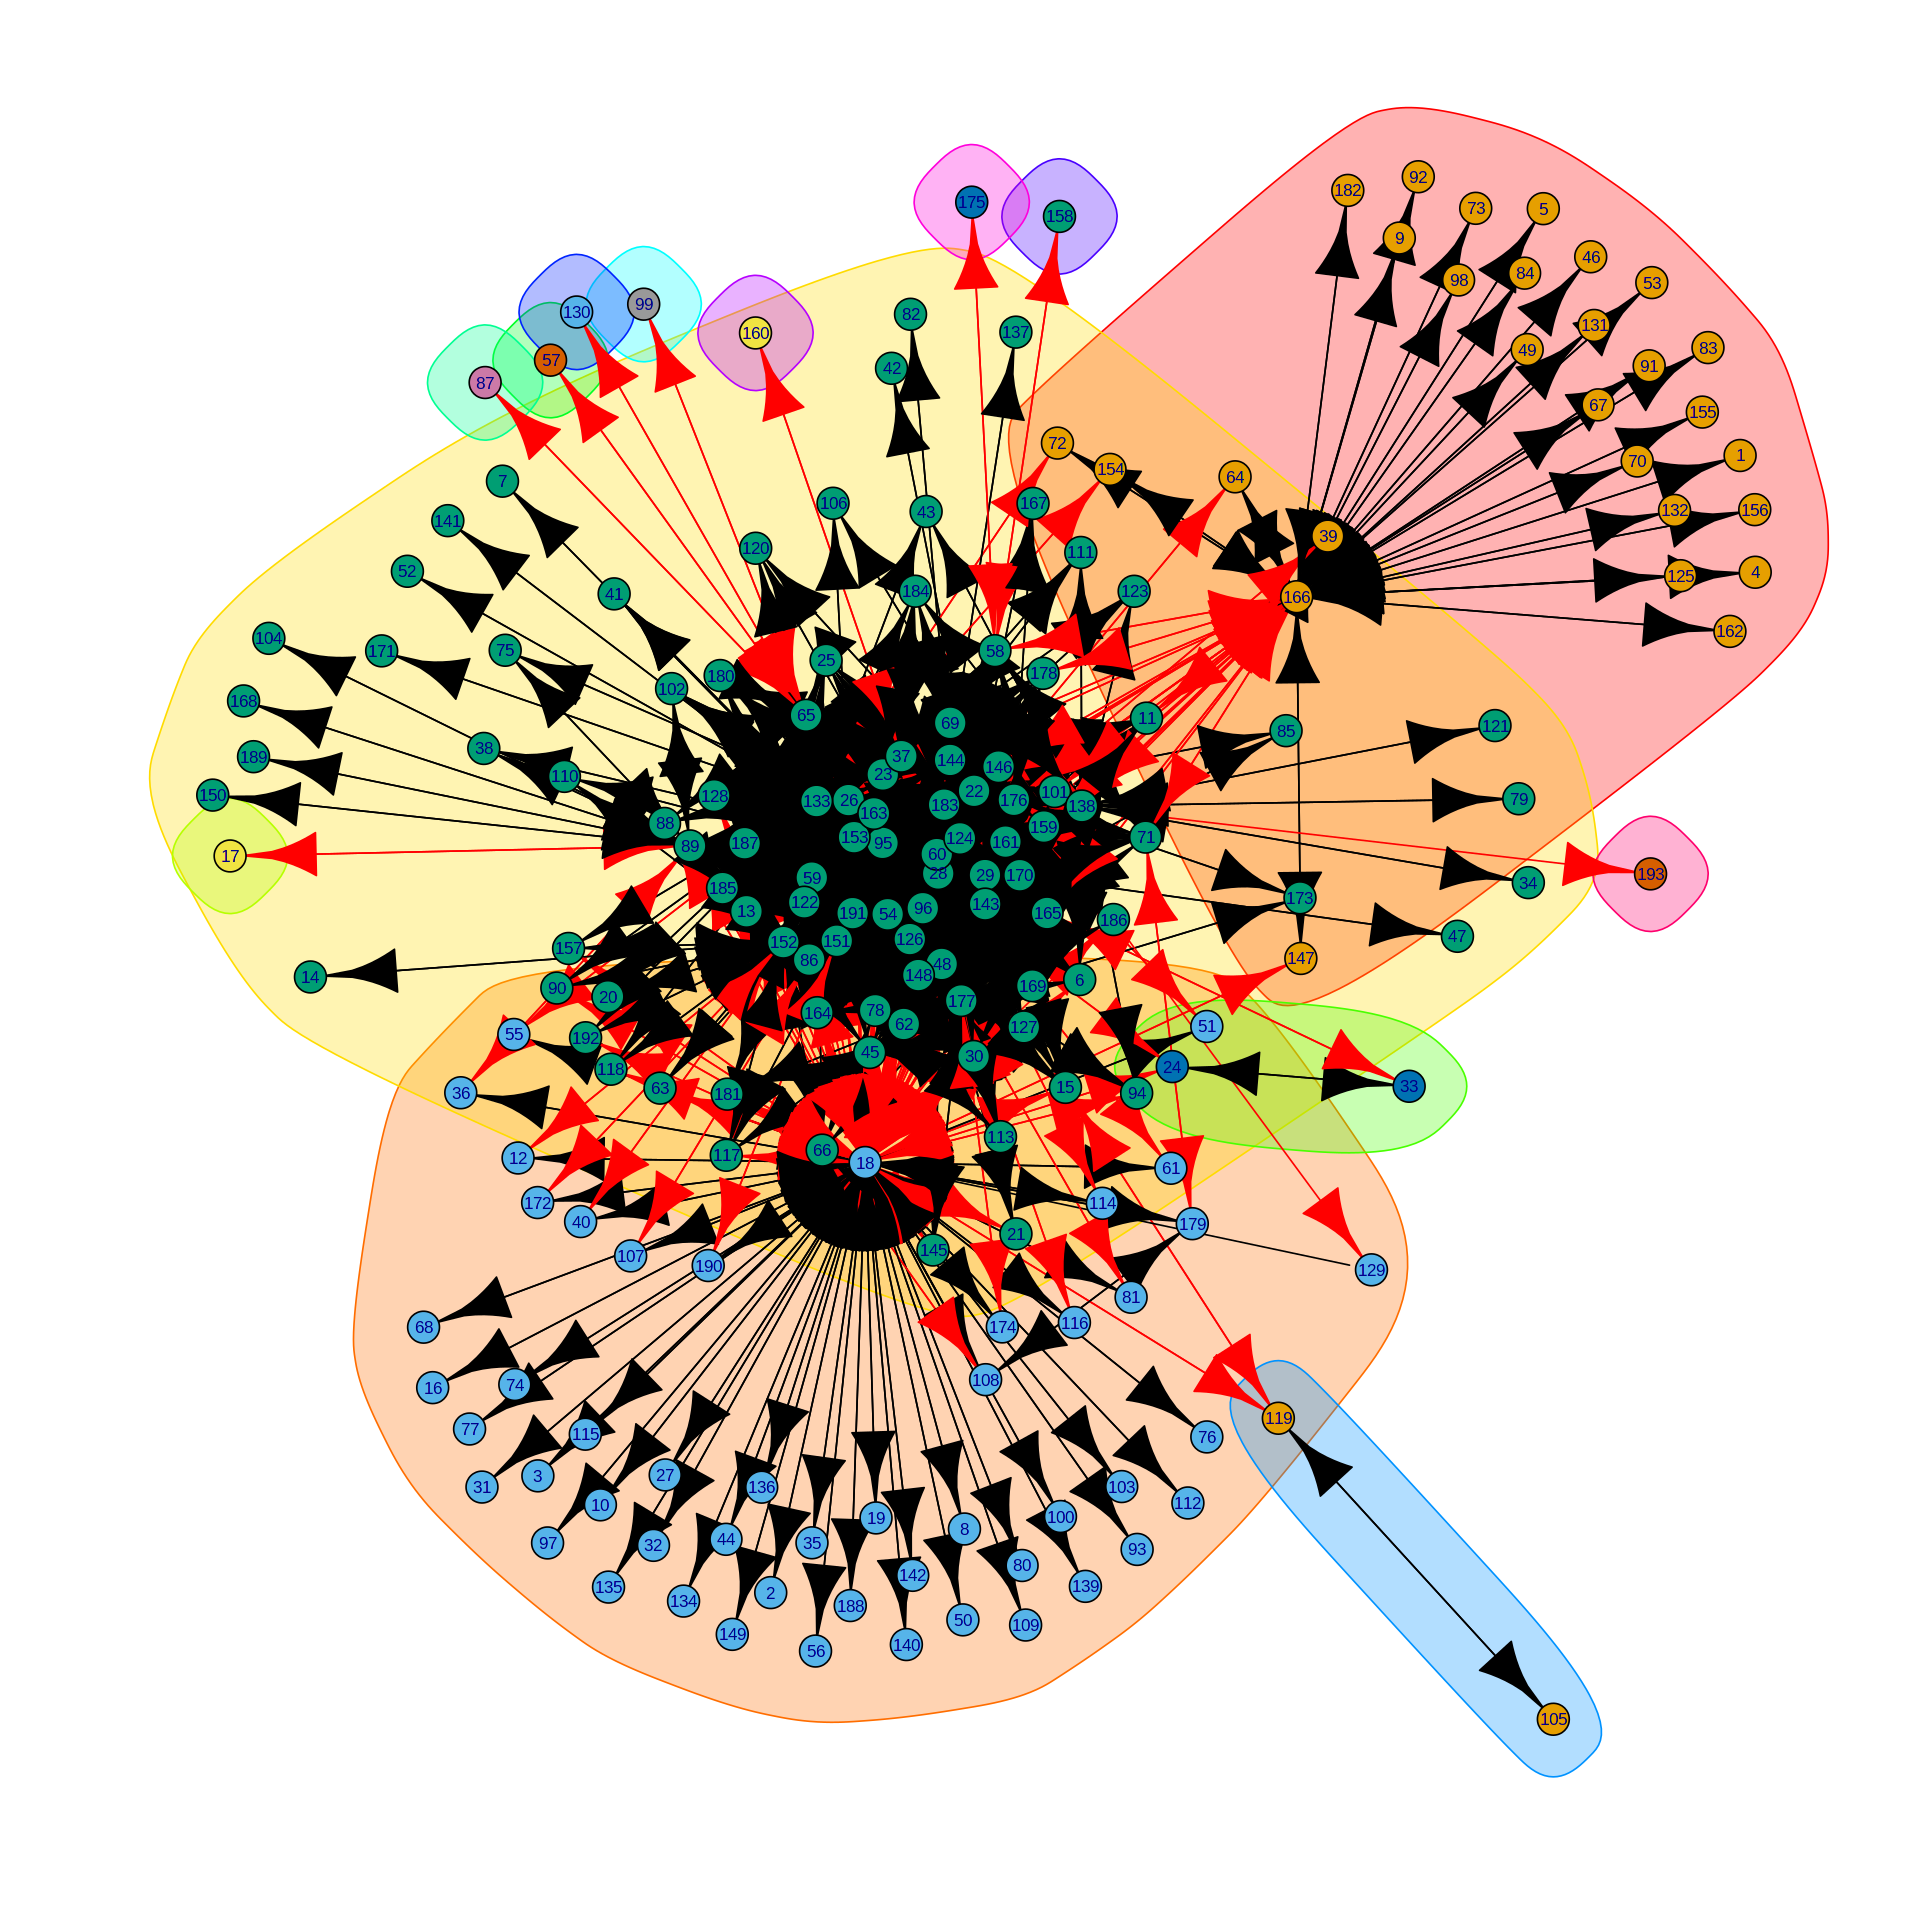

In [106]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=4, vertex.label.cex=0.8)

In [107]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 14, mod: 0.17
+ groups:
  $`1`
   [1]   1   4   5   9  39  46  49  53  64  67  70  72  73  83  84  91  92  98
  [19] 125 131 132 147 154 155 156 162 166 182
  
  $`2`
   [1]   2   3   8  10  12  16  18  19  27  31  32  35  36  40  44  50  51  55
  [19]  56  61  68  74  76  77  80  81  93  97 100 103 107 108 109 112 114 115
  [37] 116 129 134 135 136 139 140 142 149 172 174 179 188 190
  
  $`3`
  + ... omitted several groups/vertices

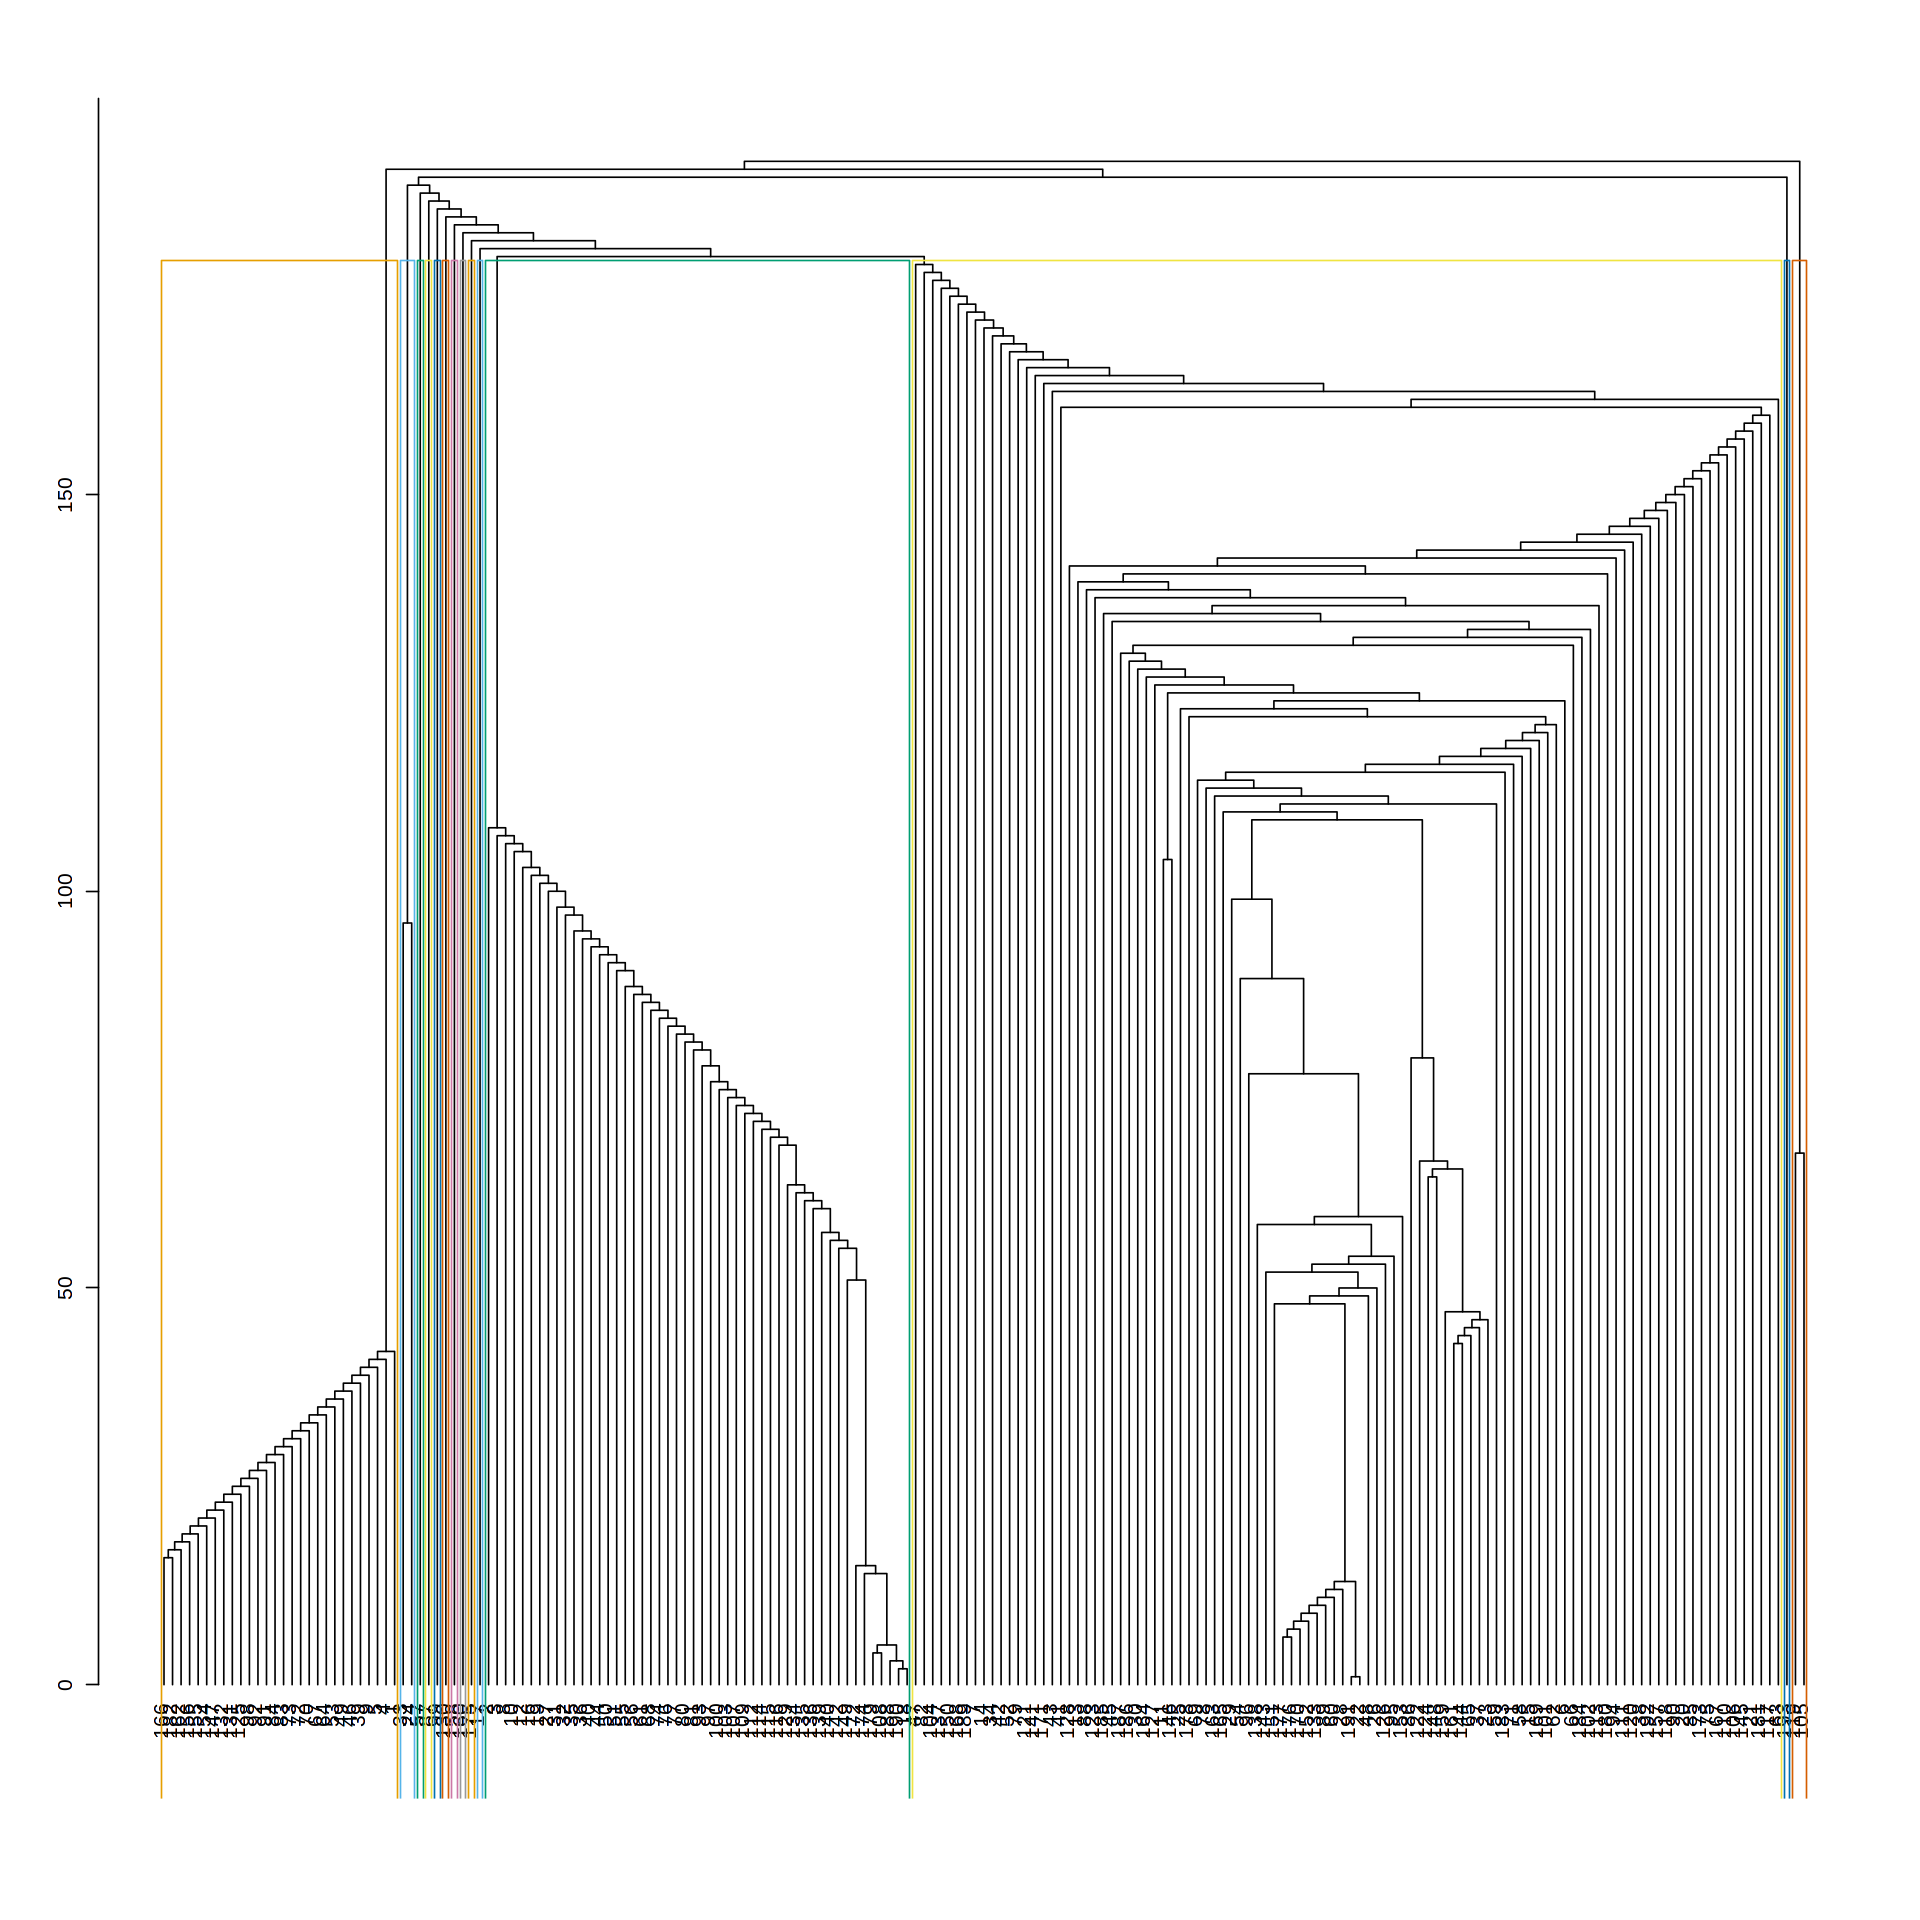

In [108]:
dendPlot(btwn, mode="hclust")

In [109]:
length(btwn)

[1] 14

In [110]:
membership(btwn)

  [1]  1  2  2  1  1  3  3  2  1  2  3  2  3  3  3  2  4  2  2  3  3  3  3  5  3
 [26]  3  2  3  3  3  2  2  5  3  2  2  3  3  1  2  3  3  3  2  3  1  3  3  1  2
 [51]  2  3  1  3  2  2  6  3  3  3  2  3  3  1  3  3  1  2  3  1  3  1  1  2  3
 [76]  2  2  3  3  2  2  3  1  1  3  3  7  3  3  3  1  1  2  3  3  3  2  1  8  2
[101]  3  3  2  3  9  3  2  2  2  3  3  2  3  2  2  2  3  3  9  3  3  3  3  3  1
[126]  3  3  3  2 10  1  1  3  2  2  2  3  3  2  2  3  2  3  3  3  3  1  3  2  3
[151]  3  3  3  1  1  1  3 11  3 12  3  1  3  3  3  1  3  3  3  3  3  2  3  2 13
[176]  3  3  3  2  3  3  1  3  3  3  3  3  2  3  2  3  3 14